In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
from matplotlib import cm

In [2]:
import numpy as np

In [3]:
data=pd.read_csv('raw_data.csv',low_memory=False,header=[0, 1])

Работа с колонками

In [4]:
cols=[i[0] for i in data.columns]

lst=list(set(cols))
lst.sort()

1) Поиск систематической ошибки

upd. Ошибка найдена, пропущенные значения в std заполнены

In [5]:
data.fillna(0)['ask_price_0'].head()

,nunique,mean,median,std,min,max,first,last
0,6,44.251409,44.2510,0.010426,44.230,44.266,44.230,44.249
1,1,44.249000,44.2490,0.000000,44.249,44.249,44.249,44.249
2,1,44.249000,44.2490,0.000000,44.249,44.249,44.249,44.249
3,5,44.230712,44.2275,0.008707,44.224,44.249,44.249,44.224
4,4,44.245810,44.2540,0.014176,44.224,44.256,44.224,44.253


In [6]:
plot_0=pd.DataFrame()
plot_0['max_bid'],plot_0['min_ask']=data['bid_price_0']['max'],data['ask_price_0']['min']

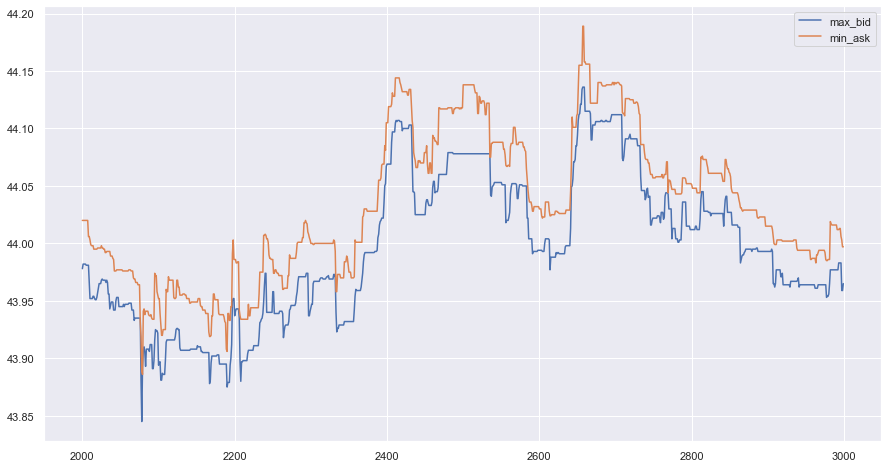

In [7]:
plot_0[2000:3000].plot();

2) Постройте распределения для следующих величин: целевая переменная (y), sum объемы для sell и buy трейдов, для всех count , сделайте новую фичу (разницу между max price и min price) и для нее тоже постройте распределение

**целевая переменная y**

In [8]:
y_fact=data.y.rename(columns={'Unnamed: 208_level_1':'y_value'})

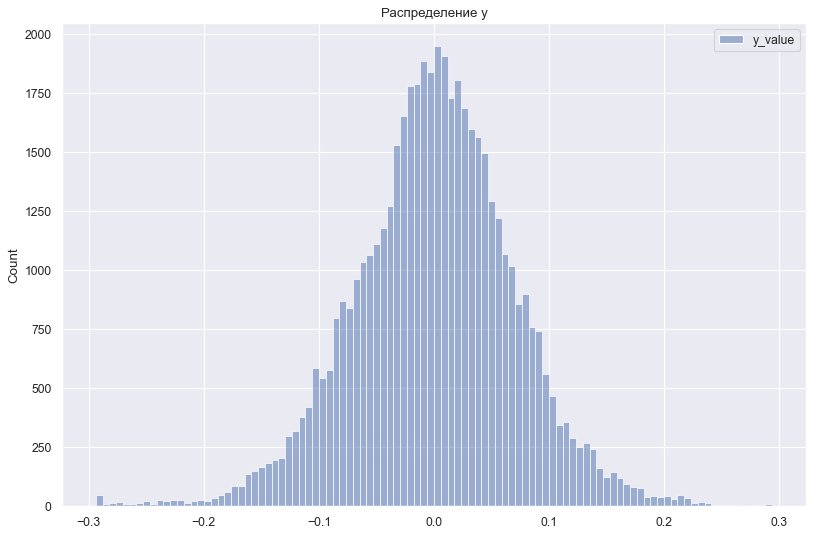

In [9]:
plt.figure(figsize=(12,8), dpi= 80)
sns.histplot(y_fact,bins=100)
plt.title('Распределение y');

**sum объемы для sell и buy трейдов**

In [10]:
volume_trades=pd.DataFrame({'mean_buy_price':data.buy_trade_price.fillna(0)['mean'],\
              'cnt_buy':data.buy_trade_quantity['sum'],\
              'mean_sell_price':data.sell_trade_price.fillna(0)['mean'],\
              'cnt_sell':data.sell_trade_quantity['sum']})

In [11]:
volume_trades.head()

,mean_buy_price,cnt_buy,mean_sell_price,cnt_sell
0,44.213,30.5,0.0,0.0
1,0.000,0.0,0.0,0.0
2,0.000,0.0,0.0,0.0
3,44.226,30.9,0.0,0.0
4,0.000,0.0,0.0,0.0


In [12]:
volume_trades['vol_buy'],volume_trades['vol_sell']=[volume_trades.mean_buy_price*volume_trades.cnt_buy,\
    volume_trades.mean_sell_price*volume_trades.cnt_sell]

In [13]:
import matplotlib.ticker as ticker

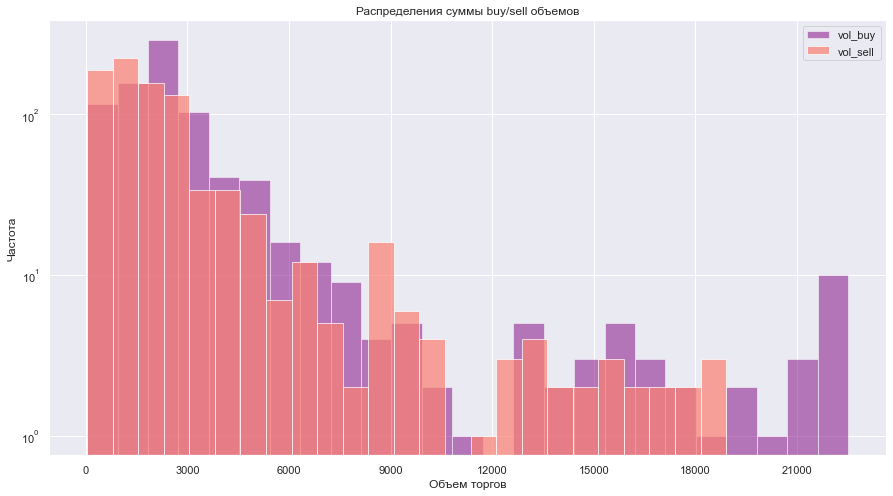

In [14]:
fig, ax = plt.subplots()
ax.hist(volume_trades.query("vol_buy>0").query("vol_buy<vol_buy.quantile(0.95)").vol_buy,\
        color='purple', alpha=0.5,log=True,bins=25,label='vol_buy')
ax.hist(volume_trades.query("vol_sell>0").query("vol_sell<vol_sell.quantile(0.95)").vol_sell,\
        color='salmon', alpha=0.7,log=True,bins=25,label='vol_sell')

ax.xaxis.set_major_locator(ticker.MultipleLocator(3000))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(2500))
ax.set(title='Распределения суммы buy/sell объемов', ylabel='Частота',xlabel='Объем торгов')
ax.legend()
ax.margins(0.05)
plt.show()

**count объемы для sell и buy трейдов**

In [15]:
volume_trades.head()

,mean_buy_price,cnt_buy,mean_sell_price,cnt_sell,vol_buy,vol_sell
0,44.213,30.5,0.0,0.0,1348.4965,0.0
1,0.000,0.0,0.0,0.0,0.0000,0.0
2,0.000,0.0,0.0,0.0,0.0000,0.0
3,44.226,30.9,0.0,0.0,1366.5834,0.0
4,0.000,0.0,0.0,0.0,0.0000,0.0


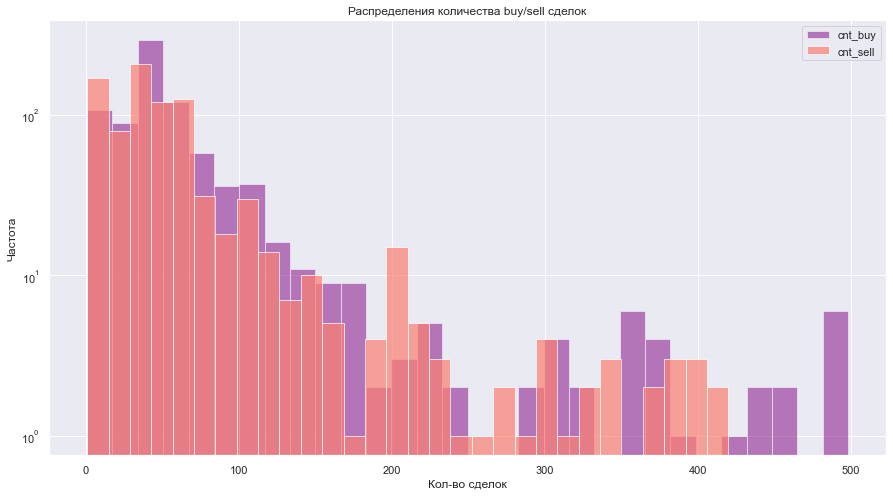

In [16]:
fig, ax = plt.subplots()
ax.hist(volume_trades.query("cnt_buy>0").query("cnt_buy<cnt_buy.quantile(0.95)")\
        .cnt_buy, color='purple', alpha=0.5,log=True,bins=30,label='cnt_buy')
ax.hist(volume_trades.query("cnt_sell>0").query("cnt_sell<cnt_sell.quantile(0.95)")\
        .cnt_sell, color='salmon', alpha=0.7,log=True,bins=30,label='cnt_sell')

ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax.set(title='Распределения количества buy/sell сделок', ylabel='Частота',xlabel='Кол-во сделок')
ax.legend()
ax.margins(0.05)
plt.show()

**Cделайте новую фичу (разницу между max price и min price трейдов) и для нее тоже постройте распределениеa**

In [17]:
'buy_trade_price'
'sell_trade_price'

'sell_trade_price'

In [18]:
a=data['sell_trade_price'].query("nunique>1")
b=data['buy_trade_price'].query("nunique>1")
#только 4 секунды, когда были трейды и на покупку и на продажу:
list(set(list(a.index)) & set(list(b.index)))

[40560, 40814, 33324, 15014]

In [19]:
diff_buy_price=data['buy_trade_price'].query("nunique>1")['max']-data['buy_trade_price'].query("nunique>1")['min']

In [20]:
diff_sell_price=data['sell_trade_price'].query("nunique>1")['max']-data['sell_trade_price'].query("nunique>1")['min']

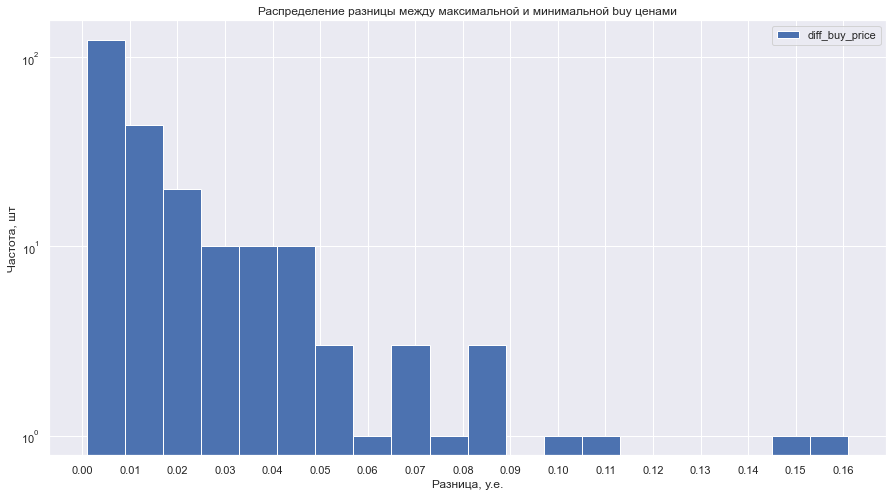

In [21]:
fig, ax = plt.subplots()
ax.hist(diff_buy_price,log=True,bins=20,label='diff_buy_price')
ax.set(title='Распределение разницы между максимальной и минимальной buy ценами', ylabel='Частота, шт',xlabel='Разница, у.е.')
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
plt.legend()
plt.show()

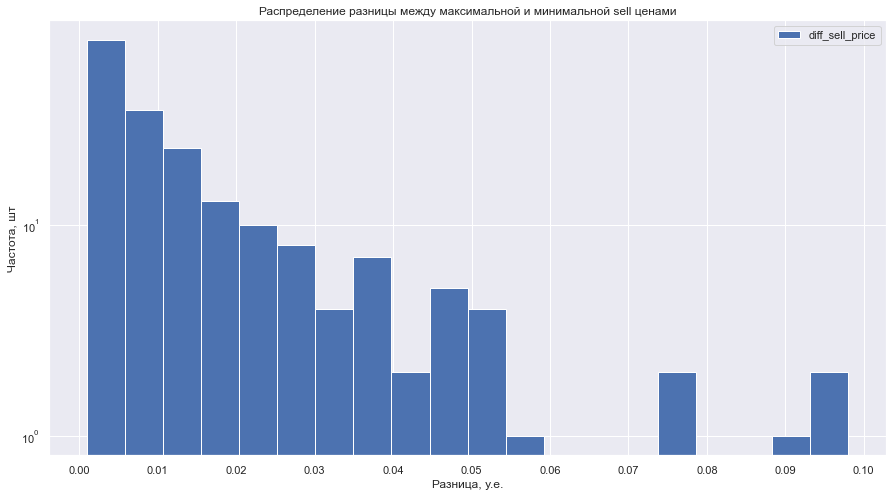

In [22]:
fig, ax = plt.subplots()
ax.hist(diff_sell_price,log=True,bins=20,label='diff_sell_price')
ax.set(title='Распределение разницы между максимальной и минимальной sell ценами', ylabel='Частота, шт',xlabel='Разница, у.е.')
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
plt.legend()
plt.show()

3) Посчитайте кумулятивные объемы по стакану (т.е. кумулятивный объем на n-том уровне определяется как объем на n-том уровне + кумулятивный объем на n-1 уровне.)

In [23]:
#расчёт в одном направлении (кумулятивные суммы отдельно для ask и bid)
cum_vol_ask=pd.DataFrame()
cum_vol_bid=pd.DataFrame()
for i in range(5):
    cum_vol_ask[f'ask_level_{i+1}']=data[f'ask_quantity_{i}']['sum']
    cum_vol_bid[f'bid_level_{i+1}']=data[f'bid_quantity_{i}']['sum']

cum_vol_ask=cum_vol_ask.expanding(axis=1).sum()
cum_vol_bid=cum_vol_bid.expanding(axis=1).sum()


#расчёт в оба направления (ask_i + bid_i)
cum_vol_sum=pd.DataFrame()
for i in range(5):
    cum_vol_sum[f'level_{i}']=data[f'ask_quantity_{i}']['sum']+data[f'bid_quantity_{i}']['sum']
cum_vol_sum=cum_vol_sum.expanding(axis=1).sum()

In [24]:
cum_vol=cum_vol_ask.join(cum_vol_bid)
cum_vol.columns=cum_vol.columns.str.replace('_level_','_level_cum_')
cum_vol_sum.columns=cum_vol_sum.columns.str.replace('level_','level_cum_')

In [25]:
cum_vol.head()

,ask_level_cum_1,ask_level_cum_2,ask_level_cum_3,ask_level_cum_4,ask_level_cum_5,bid_level_cum_1,bid_level_cum_2,bid_level_cum_3,bid_level_cum_4,bid_level_cum_5
0,1707.7,5687.1,13402.9,22008.4,34256.0,25880.7,40277.9,61245.5,77627.4,94769.9
1,396.5,1239.8,2363.2,3676.7,4313.0,76.7,473.2,1257.1,1653.6,2215.2
2,457.5,1405.5,3730.5,4059.9,4569.6,597.5,1144.4,1993.9,22247.4,26892.7
3,1501.0,3933.3,9144.7,14180.9,17965.8,2062.8,5100.6,10416.5,48022.1,78011.1
4,582.7,1548.9,3428.6,6111.0,8039.8,6350.8,6892.9,8406.4,14653.7,15937.2


In [26]:
cum_vol['time']=cum_vol.index
cum_vol.head()

,ask_level_cum_1,ask_level_cum_2,ask_level_cum_3,ask_level_cum_4,ask_level_cum_5,bid_level_cum_1,bid_level_cum_2,bid_level_cum_3,bid_level_cum_4,bid_level_cum_5,time
0,1707.7,5687.1,13402.9,22008.4,34256.0,25880.7,40277.9,61245.5,77627.4,94769.9,0
1,396.5,1239.8,2363.2,3676.7,4313.0,76.7,473.2,1257.1,1653.6,2215.2,1
2,457.5,1405.5,3730.5,4059.9,4569.6,597.5,1144.4,1993.9,22247.4,26892.7,2
3,1501.0,3933.3,9144.7,14180.9,17965.8,2062.8,5100.6,10416.5,48022.1,78011.1,3
4,582.7,1548.9,3428.6,6111.0,8039.8,6350.8,6892.9,8406.4,14653.7,15937.2,4


In [27]:
plot_cum_data=pd.melt(cum_vol,id_vars='time',\
                   value_vars=cum_vol.columns[:-1], var_name='level_cum',\
                   value_name='vol')

AttributeError: 'UnaryOp' object has no attribute 'evaluate'

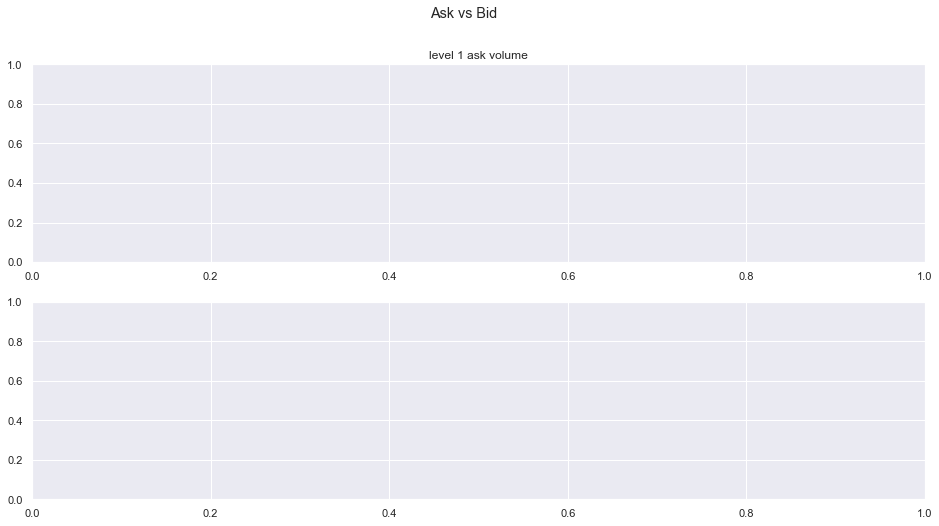

In [28]:
fig, axs = plt.subplots(2,  figsize=(16,8))
fig.suptitle('Ask vs Bid')
axs[0].set_title('level 1 ask volume')
axs[0].plot(plot_cum_data.query("level_cum==-1").vol)
axs[1].set_title('level 1 bid volume')
axs[1].plot(plot_cum_data.query("level_cum==1").vol)
#axs[2].plot(plot_cum_data.query("level_cum==-3").vol)
plt.show()

In [29]:
plot_cum_data.head()

,time,level_cum,vol
0,0,ask_level_cum_1,1707.7
1,1,ask_level_cum_1,396.5
2,2,ask_level_cum_1,457.5
3,3,ask_level_cum_1,1501.0
4,4,ask_level_cum_1,582.7


In [30]:
#-1,-2,-3,-4,-5 - ask
# 1,2,3,4,5 - bid
plot_cum_data.level_cum=plot_cum_data.level_cum\
    .str.replace('ask_level_cum_','-').str.replace('bid_level_cum_','').map(int)

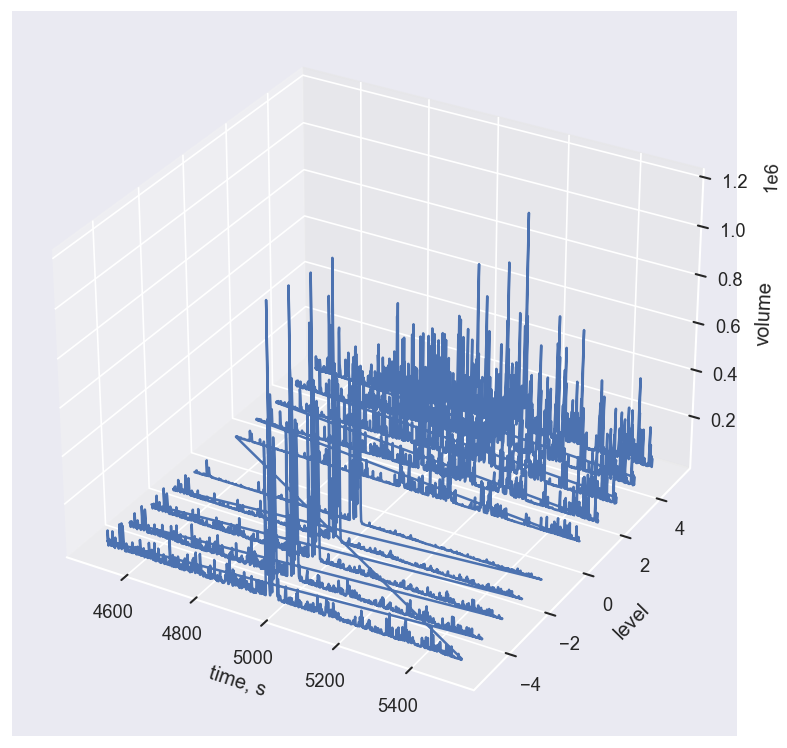

In [31]:
a=plot_cum_data.loc[plot_cum_data.time.map(lambda x: x in range(4500,5500))]

fig = plt.figure(dpi=120)
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs=a.time, ys=a.level_cum, zs=a.vol)
ax.set_xlabel('time, s')
ax.set_ylabel('level')
ax.set_zlabel('volume')
plt.show()

4) Постройте графики зависимостей целевой переменной от: объемов в стакане на 1-м уровне, от nunique значений цен в трейдах, от разницы nunique между buy и sell трейдами (+аналогично для колонки с count)

**Y**

In [32]:
plt_1_data=y_fact.join(cum_vol_sum.level_cum_0)

**ОБЪЕМ в стакане на 1 уровне**

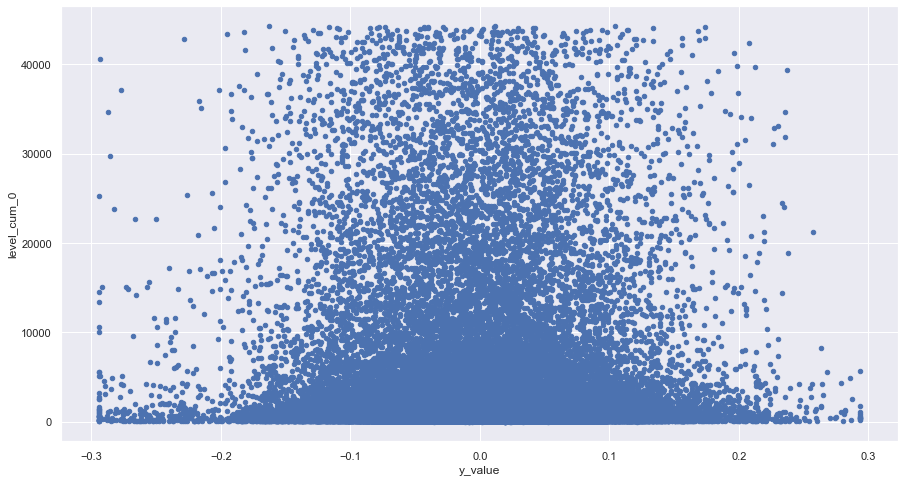

In [33]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

plt_1_data.query("level_cum_0<level_cum_0.quantile(0.95)").plot.scatter(x='y_value',y='level_cum_0');

**NUNIQUE**

Сумма:

In [34]:
trade_unique_sum=data.sell_trade_quantity['nunique']+data.buy_trade_quantity['nunique']
trade_unique_sum=trade_unique_sum.rename('sum_n_unique')

In [35]:
plt_2_data=y_fact.join(trade_unique_sum)
plt_2_data.head()

,y_value,sum_n_unique
0,-0.065894,1
1,-0.066870,0
2,-0.064833,0
3,-0.040764,1
4,-0.063813,0


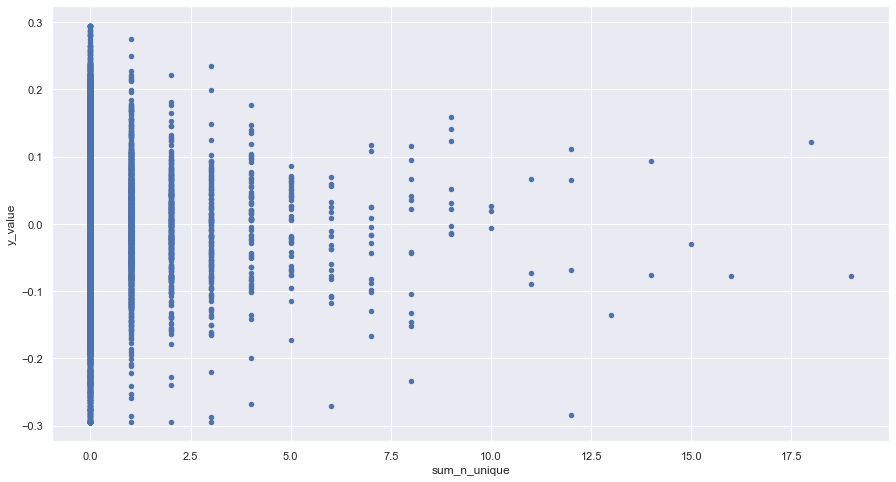

In [36]:
plt_2_data.plot.scatter(y='y_value',x='sum_n_unique');

Разница:

In [37]:
trade_unique_diff=data.buy_trade_quantity['nunique']-data.sell_trade_quantity['nunique']
trade_unique_diff=trade_unique_diff.rename('diff_n_unique')

In [38]:
plt_3_data=y_fact.join(trade_unique_diff)
plt_3_data.head()

,y_value,diff_n_unique
0,-0.065894,1
1,-0.066870,0
2,-0.064833,0
3,-0.040764,1
4,-0.063813,0


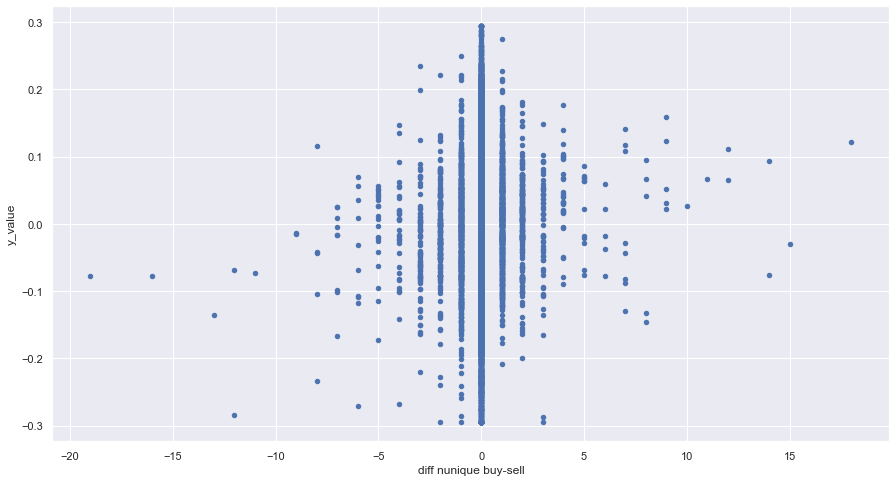

In [39]:
plt_3_data.plot.scatter(x='diff_n_unique',y='y_value',xlabel='diff nunique buy-sell');

**COUNT**

**ОБЪЕМ в стакане на 1 уровне**

In [40]:
cnt_trades=data['buy_trade_quantity']['sum']+data['sell_trade_quantity']['sum']
cnt_trades=cnt_trades.rename('cnt_trades').to_frame()

In [41]:
plt_4_data=cnt_trades.join(cum_vol_sum.level_cum_0)
plt_4_data.head()

,cnt_trades,level_cum_0
0,30.5,27588.4
1,0.0,473.2
2,0.0,1055.0
3,30.9,3563.8
4,0.0,6933.5


In [42]:
plt_4_data=plt_4_data.loc[plt_4_data.cnt_trades>0]

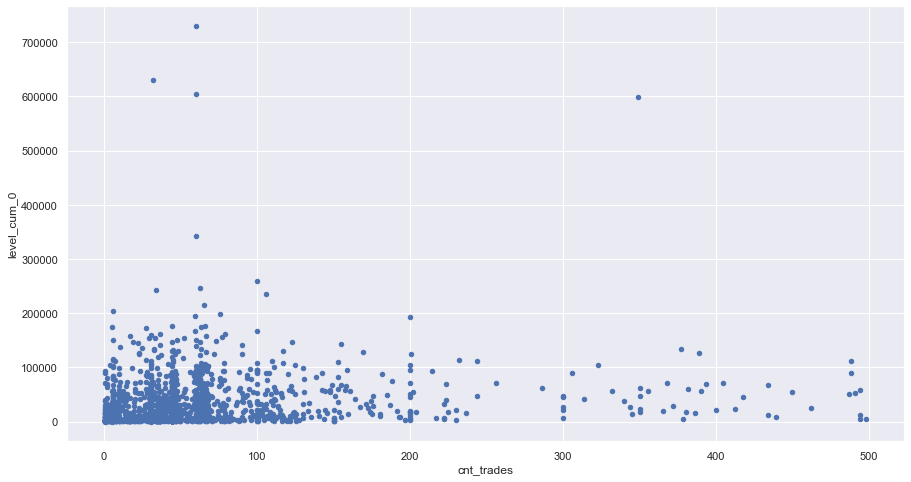

In [43]:
plt_4_data.query("cnt_trades<cnt_trades.quantile(0.95)")\
    .plot.scatter(x='cnt_trades',y='level_cum_0');

**NUNIQUE**

Сумма

In [44]:
plt_5_data=cnt_trades.join(trade_unique_sum)
plt_5_data.head()

,cnt_trades,sum_n_unique
0,30.5,1
1,0.0,0
2,0.0,0
3,30.9,1
4,0.0,0


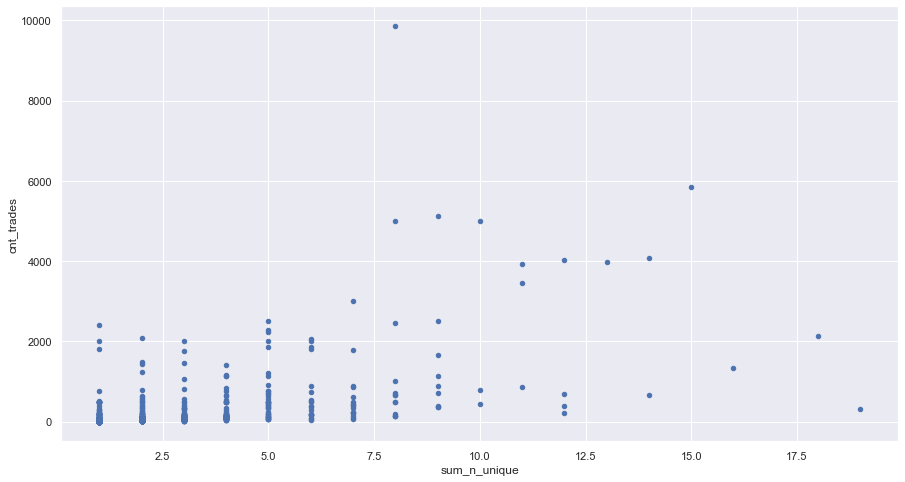

In [45]:
plt_5_data.loc[plt_5_data.cnt_trades>0].plot.scatter(x='sum_n_unique',y='cnt_trades');

Разница

In [46]:
plt_6_data=cnt_trades.join(trade_unique_diff)
plt_6_data.head()

,cnt_trades,diff_n_unique
0,30.5,1
1,0.0,0
2,0.0,0
3,30.9,1
4,0.0,0


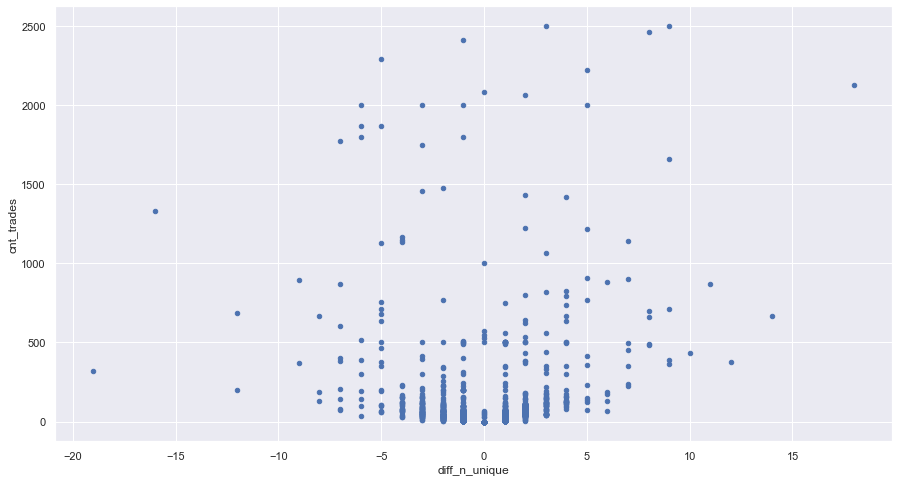

In [47]:
plt_6_data.loc[plt_6_data.cnt_trades<3000].plot.scatter(x='diff_n_unique',y='cnt_trades');

5) Посчитайте статистики для целевой переменной (min, max, mean, median, q25, q75, q95  - направленные квантили от медианного значения).

In [48]:
y_fact.describe()

,y_value
count,50000.000000
mean,0.000457
std,0.070580
min,-0.293779
25%,-0.042033
50%,0.001600
75%,0.044370
max,0.293779


95 квантиль:

In [49]:
{'value':y_fact.quantile(0.95)}

{'value': y_value    0.1132
 Name: 0.95, dtype: float64}

Регрессионное дерево

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
#для начала запихну уже рассчитанные величины
X=cum_vol.drop('time',axis=1).merge(volume_trades,left_index=True,right_index=True)

In [52]:
y=data['y']
y=y.rename(columns={'Unnamed: 208_level_1':'y'})

In [69]:
X.shape

(50000, 16)

In [70]:
y.shape

(50000, 1)

In [53]:
from sklearn.model_selection import train_test_split,cross_val_score

In [74]:
length

50000

In [76]:
train_n=int(0.75*len(X))
X_train,X_test = X[:train_n], X[train_n:]
y_train,y_test = y[:train_n], y[train_n:]

In [78]:
dtr=DecisionTreeRegressor()

In [79]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [80]:
cross_val_score(dtr,X_train,y_train,cv=5).mean()

-1.328279738896932

In [81]:
y_pred=dtr.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [83]:
mean_squared_error(y_test,y_pred)

0.011518189073708945

In [84]:
r2_score(y_test,y_pred)

-1.2216856154488425

In [96]:
y_test.merge(pd.DataFrame(index=y_test.index, data={'y_pred':y_pred}),left_index=True,right_index=True)

,y,y_pred
37500,0.074500,0.015580
37501,0.075000,-0.101073
37502,0.063836,-0.036808
37503,0.059611,0.042816
37504,0.061843,-0.029500
...,...,...
49995,0.058802,-0.047112
49996,0.053264,-0.046792
49997,0.053500,-0.047156
49998,0.052020,-0.037500


In [90]:
y_pred

array([ 0.01558046, -0.10107258, -0.03680769, ..., -0.04715625,
       -0.0375    ,  0.01002962])